In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
import sklearn as skl 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math 
from pandas.plotting import scatter_matrix
import plotly.express as px

In [2]:
gtd_df = pd.read_excel('../data/globalterrorismdb_0522dist.xlsx')

In [3]:
gtd_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [4]:
gtd_df

eventid  iyear  imonth  iday           approxdate  extended  \
0       197000000001   1970       7     2                  NaN         0   
1       197000000002   1970       0     0                  NaN         0   
2       197001000001   1970       1     0                  NaN         0   
3       197001000002   1970       1     0                  NaN         0   
4       197001000003   1970       1     0                  NaN         0   
...              ...    ...     ...   ...                  ...       ...   
209701  202012310015   2020      12    31  2020-12-31 00:00:00         0   
209702  202012310016   2020      12    31  2020-12-31 00:00:00         0   
209703  202012310017   2020      12    31                  NaN         0   
209704  202012310018   2020      12    31                  NaN         0   
209705  202012310019   2020      12    31                  NaN         1   

       resolution  country         country_txt  region  ... addnotes  \
0             NaT       58  Dominican Republic       2  ...      NaN   
1             NaT      130              Mexico       1  ...      NaN   
2             NaT      160         Philippines       5  ...      NaN   
3             NaT       78              Greece       8  ...      NaN   
4             NaT      101               Japan       4  ...      NaN   
...           ...      ...                 ...     ...  ...      ...   
209701        NaT      228               Yemen      10  ...      NaN   
209702        NaT      228               Yemen      10  ...      NaN   
209703        NaT       75             Germany       8  ...      NaN   
209704        NaT        4         Afghanistan       6  ...      NaN   
209705        NaT       33        Burkina Faso      11  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
209701  "Al Houthi militia escalated in Hays and targe...   
209702  "Al Houthi militia escalated in Hays and targe...   
209703  "Far-left arson attack suspected on German asy...   
209704  "Civil society activist and tribal elder kille...   
209705  "Terrorism Digest: 3-4 Jan 21," BBC Monitoring...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
209701                                                NaN   
209702                                                NaN   
209703  "Fire of Bundeswehr vehicles in Leipzig, proba...   
209704  "Terrorism Digest: 1-2 Jan 21," BBC Monitoring...   
209705                                                NaN   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
209701                                                NaN   
209702                                                NaN   
209703  "Anarchist Antifa Take Credit for Arson Attack...   
209704                                                NaN   
209705                                                NaN   

                        dbsource  IN

In [5]:
gtd_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
gtd_df.shape

(209706, 135)

In [7]:
gtd_df.groupby('country_txt').size().nlargest(10)

country_txt
Iraq              27521
Afghanistan       18920
Pakistan          15504
India             13929
Colombia           8915
Philippines        8271
Peru               6111
Yemen              6027
Nigeria            5550
United Kingdom     5513
dtype: int64

In [8]:
gtd_df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    197017
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       179102
Length: 135, dtype: int64

In [9]:
gtd_df2 = gtd_df[['iyear', 'imonth', 'iday', 'country', 'country_txt', 'region', 'region_txt',
                'provstate', 'city', 'attacktype1', 'attacktype1_txt', 'targtype1',
                'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'target1', 'natlty1', 'natlty1_txt',
                'gname', 'weaptype1', 'weaptype1_txt']]

In [10]:
gtd_df2.shape

(209706, 21)

In [11]:
gtd_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             209706 non-null  int64  
 1   imonth            209706 non-null  int64  
 2   iday              209706 non-null  int64  
 3   country           209706 non-null  int64  
 4   country_txt       209706 non-null  object 
 5   region            209706 non-null  int64  
 6   region_txt        209706 non-null  object 
 7   provstate         209706 non-null  object 
 8   city              209280 non-null  object 
 9   attacktype1       209706 non-null  int64  
 10  attacktype1_txt   209706 non-null  object 
 11  targtype1         209706 non-null  int64  
 12  targtype1_txt     209706 non-null  object 
 13  targsubtype1      197867 non-null  float64
 14  targsubtype1_txt  197867 non-null  object 
 15  target1           209071 non-null  object 
 16  natlty1           20

In [12]:
gtd_df2

iyear  imonth  iday  country         country_txt  region  \
0        1970       7     2       58  Dominican Republic       2   
1        1970       0     0      130              Mexico       1   
2        1970       1     0      160         Philippines       5   
3        1970       1     0       78              Greece       8   
4        1970       1     0      101               Japan       4   
...       ...     ...   ...      ...                 ...     ...   
209701   2020      12    31      228               Yemen      10   
209702   2020      12    31      228               Yemen      10   
209703   2020      12    31       75             Germany       8   
209704   2020      12    31        4         Afghanistan       6   
209705   2020      12    31       33        Burkina Faso      11   

                         region_txt     provstate           city  attacktype1  \
0       Central America & Caribbean      National  Santo Domingo            1   
1                     North America       Federal    Mexico city            6   
2                    Southeast Asia        Tarlac        Unknown            1   
3                    Western Europe        Attica         Athens            3   
4                         East Asia       Fukouka        Fukouka            7   
...                             ...           ...            ...          ...   
209701   Middle East & North Africa   Al Hudaydah          Sabaa            3   
209702   Middle East & North Africa   Al Hudaydah   Beit Maghari            3   
209703               Western Europe  Lower Saxony        Leipzig            7   
209704                   South Asia         Kabul          Kabul            2   
209705           Sub-Saharan Africa         Sahel          Kelbo            2   

        ... targtype1                targtype1_txt targsubtype1  \
0       ...        14  Private Citizens & Property         68.0   
1       ...         7      Government (Diplomatic)         45.0   
2       ...        10          Journalists & Media         54.0   
3       ...         7      Government (Diplomatic)         46.0   
4       ...         7      Government (Diplomatic)         46.0   
...     ...       ...                          ...          ...   
209701  ...        14  Private Citizens & Property         76.0   
209702  ...        14  Private Citizens & Property         76.0   
209703  ...         4                     Military         35.0   
209704  ...        14  Private Citizens & Property         83.0   
209705  ...         4                     Military         39.0   

                                         targsubtype1_txt  \
0                                          Named Civilian   
1       Diplomatic Personnel (outside of embassy, cons...   
2                         Radio Journalist/Staff/Facility   
3                                       Embassy/Consulate   
4                                       Embassy/Consulate   
...                                                   ...   
209701                          House/Apartment/Residence   
209702                          House/Apartment/Residence   
209703  Military Transportation/Vehicle (excluding con...   
209704                                          Protester   
209705                                       Paramilitary   

                        target1 natlty1         natlty1_txt  \
0                  Julio Guzman    58.0  Dominican Republic   
1       Nadine Chaval, daughter    21.0             Belgium   
2                      Employee   217.0       United States   
3                  U.S. Embassy   217.0       United States   
4                U.S. Consulate   217.0       United States   
...                         ...     ...                 ...   
209701               Residences   228.0               Yemen   
209702               Residences   228.0               Yemen   
209703      Wolf-Class Vehicles    75.0             Germany   
209704     Activist: Abdi Jahid     4.0         Af

In [13]:
gtd_df2['targsubtype1'].fillna(0.0, inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1578/1082826831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['targsubtype1'].fillna(0.0, inplace=True)


In [14]:
gtd_df2['city'].fillna('Unknown', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1578/1948848045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['city'].fillna('Unknown', inplace=True)


In [15]:
gtd_df2['targsubtype1_txt'].fillna('Unknown', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1578/1050358810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['targsubtype1_txt'].fillna('Unknown', inplace=True)


In [16]:
gtd_df2['target1'].fillna('Unknown', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1578/2086078965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['target1'].fillna('Unknown', inplace=True)


In [17]:
gtd_df2['natlty1_txt'].fillna('Unidentified', inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1578/2218764372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['natlty1_txt'].fillna('Unidentified', inplace=True)


In [18]:
gtd_df2['natlty1'].fillna(0.0, inplace=True)

/var/folders/dd/k00sjjp52gv4pmkp1d0cc0m40000gn/T/ipykernel_1578/2388825530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_df2['natlty1'].fillna(0.0, inplace=True)


In [19]:
gtd_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             209706 non-null  int64  
 1   imonth            209706 non-null  int64  
 2   iday              209706 non-null  int64  
 3   country           209706 non-null  int64  
 4   country_txt       209706 non-null  object 
 5   region            209706 non-null  int64  
 6   region_txt        209706 non-null  object 
 7   provstate         209706 non-null  object 
 8   city              209706 non-null  object 
 9   attacktype1       209706 non-null  int64  
 10  attacktype1_txt   209706 non-null  object 
 11  targtype1         209706 non-null  int64  
 12  targtype1_txt     209706 non-null  object 
 13  targsubtype1      209706 non-null  float64
 14  targsubtype1_txt  209706 non-null  object 
 15  target1           209706 non-null  object 
 16  natlty1           20

In [20]:
gtd_df2.shape

(209706, 21)

array([[<Axes: xlabel='iyear', ylabel='iyear'>,
        <Axes: xlabel='imonth', ylabel='iyear'>,
        <Axes: xlabel='iday', ylabel='iyear'>,
        <Axes: xlabel='country', ylabel='iyear'>,
        <Axes: xlabel='region', ylabel='iyear'>,
        <Axes: xlabel='attacktype1', ylabel='iyear'>,
        <Axes: xlabel='targtype1', ylabel='iyear'>,
        <Axes: xlabel='targsubtype1', ylabel='iyear'>,
        <Axes: xlabel='natlty1', ylabel='iyear'>,
        <Axes: xlabel='weaptype1', ylabel='iyear'>],
       [<Axes: xlabel='iyear', ylabel='imonth'>,
        <Axes: xlabel='imonth', ylabel='imonth'>,
        <Axes: xlabel='iday', ylabel='imonth'>,
        <Axes: xlabel='country', ylabel='imonth'>,
        <Axes: xlabel='region', ylabel='imonth'>,
        <Axes: xlabel='attacktype1', ylabel='imonth'>,
        <Axes: xlabel='targtype1', ylabel='imonth'>,
        <Axes: xlabel='targsubtype1', ylabel='imonth'>,
        <Axes: xlabel='natlty1', ylabel='imonth'>,
        <Axes: xlabel='weaptyp

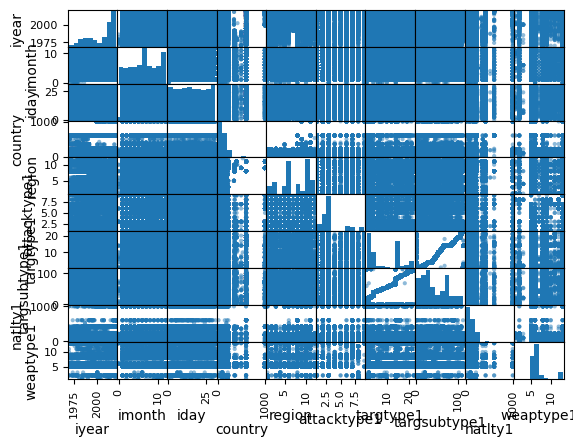

In [21]:
scatter_matrix(gtd_df2)

In [22]:
taliban_atk_df = gtd_df2[gtd_df2['gname'] == 'Taliban'].reset_index(drop=True)
taliban_atk_df.head()

iyear  imonth  iday  country  country_txt  region  region_txt provstate  \
0   1995       4    20        4  Afghanistan       6  South Asia   Unknown   
1   1995       8     3        4  Afghanistan       6  South Asia  Kandahar   
2   1995       9    21        4  Afghanistan       6  South Asia  Kandahar   
3   1995      10    25        4  Afghanistan       6  South Asia     Kabul   
4   2001       1     7        4  Afghanistan       6  South Asia    Bamyan   

        city  attacktype1  ... targtype1                targtype1_txt  \
0    Unknown            6  ...         3                       Police   
1   Kandahar            4  ...         6          Airports & Aircraft   
2   Kandahar            4  ...         6          Airports & Aircraft   
3      Kabul            3  ...         6          Airports & Aircraft   
4  Yakawlang            2  ...        14  Private Citizens & Property   

  targsubtype1                                 targsubtype1_txt  \
0         22.0  Police Building (headquarters, station, school)   
1         42.0                     Aircraft (not at an airport)   
2         42.0                     Aircraft (not at an airport)   
3         42.0                     Aircraft (not at an airport)   
4         67.0                     Unnamed Civilian/Unspecified   

                                         target1 natlty1  natlty1_txt  \
0                   Federal Investigation Agency   153.0     Pakistan   
1                   Russian Il-76 Cargo Aircraft   167.0       Russia   
2                                     Boeing 727     4.0  Afghanistan   
3                       ICRC- Chartered Aircraft   199.0  Switzerland   
4  Civilians living in the vicinity of Yakawlang     4.0  Afghanistan   

     gname weaptype1  weaptype1_txt  
0  Taliban        13        Unknown  
1  Taliban         6     Explosives  
2  Taliban         6     Explosives  
3  Taliban         6     Explosives  
4  Taliban         5       Firearms  

[5 rows x 21 columns]

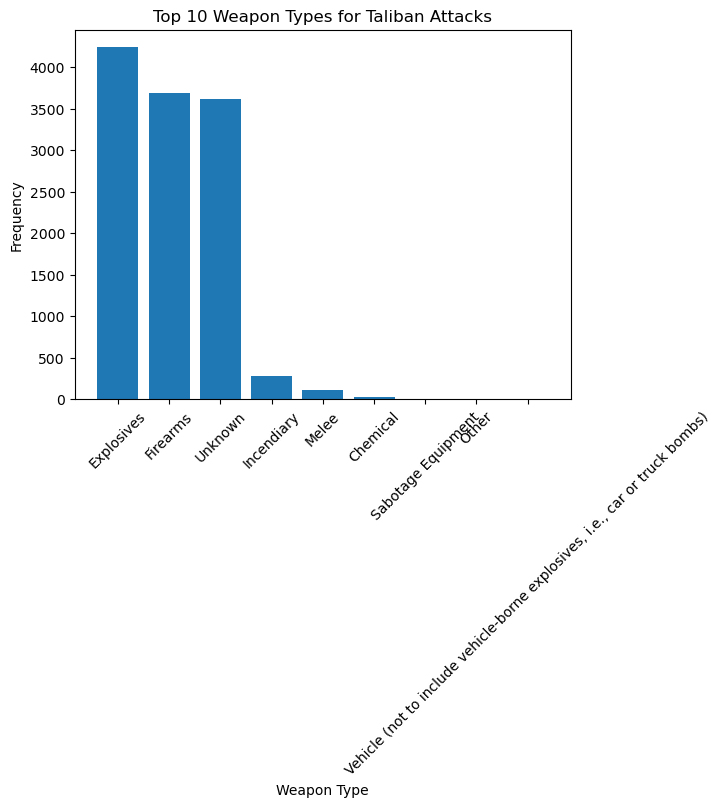

In [23]:
taliban_weapons = taliban_atk_df['weaptype1_txt'].value_counts().nlargest(10)

plt.bar(taliban_weapons.index, taliban_weapons.values)
plt.xlabel('Weapon Type')
plt.ylabel('Frequency')
plt.title('Top 10 Weapon Types for Taliban Attacks')
plt.xticks(rotation=45)
plt.show()

In [24]:
taliban_atk_df['targsubtype1_txt'].value_counts().nlargest(10)

Police Building (headquarters, station, school)            1379
Police Security Forces/Officers                            1108
Military Barracks/Base/Headquarters/Checkpost              1093
Police Checkpoint                                           983
Unnamed Civilian/Unspecified                                682
Military Personnel (soldiers, troops, officers, forces)     536
Police Patrol (including vehicles and convoys)              524
Government Personnel (excluding police, military)           485
NATO                                                        463
Unknown                                                     439
Name: targsubtype1_txt, dtype: int64

In [25]:
taliban_atk_df['targtype1_txt'].value_counts().nlargest(10)

Police                            4028
Military                          2893
Private Citizens & Property       2016
Government (General)              1280
Unknown                            371
Terrorists/Non-State Militia       365
Business                           281
Educational Institution            170
Transportation                     137
Religious Figures/Institutions     106
Name: targtype1_txt, dtype: int64

(array([4.000e+00, 0.000e+00, 1.100e+01, 1.050e+02, 4.920e+02, 5.270e+02,
        1.323e+03, 1.810e+03, 3.208e+03, 4.502e+03]),
 array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5, 2020. ]),
 <BarContainer object of 10 artists>)

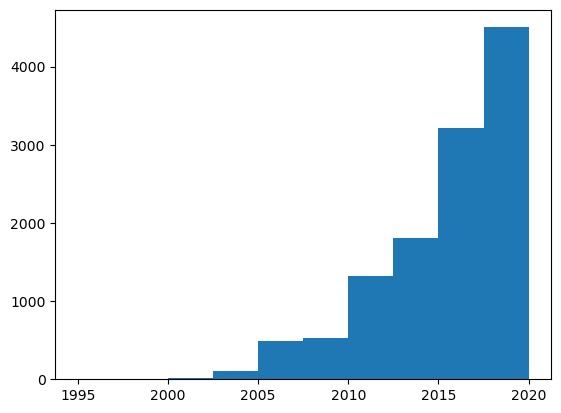

In [26]:
plt.hist(taliban_atk_df['iyear'])

In [27]:
px.histogram(taliban_atk_df, x='iyear')

In [28]:
unknown_atk_df = gtd_df2[gtd_df2['gname'] == 'Unknown'].reset_index(drop=True)
unknown_atk_df['weaptype1_txt'].value_counts().nlargest(10)

Explosives                                                                     53306
Firearms                                                                       26856
Incendiary                                                                      5373
Unknown                                                                         4646
Melee                                                                           1359
Chemical                                                                         174
Sabotage Equipment                                                                69
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       37
Other                                                                             35
Biological                                                                        22
Name: weaptype1_txt, dtype: int64

(array([  512.,  2215.,  5164.,  4328.,  5901.,  6197.,  3071., 10891.,
        27670., 25957.]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
        2015., 2020.]),
 <BarContainer object of 10 artists>)

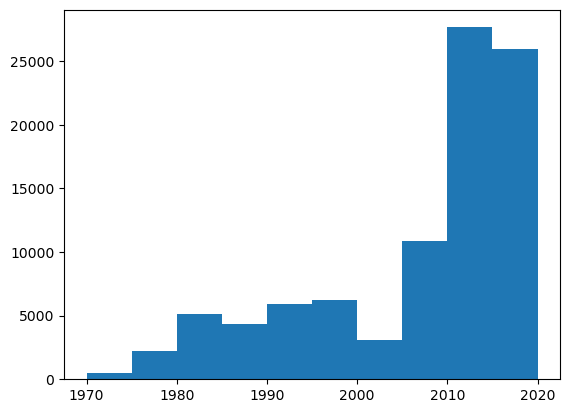

In [29]:
plt.hist(unknown_atk_df['iyear'])

In [30]:
px.histogram(unknown_atk_df, x='iyear')

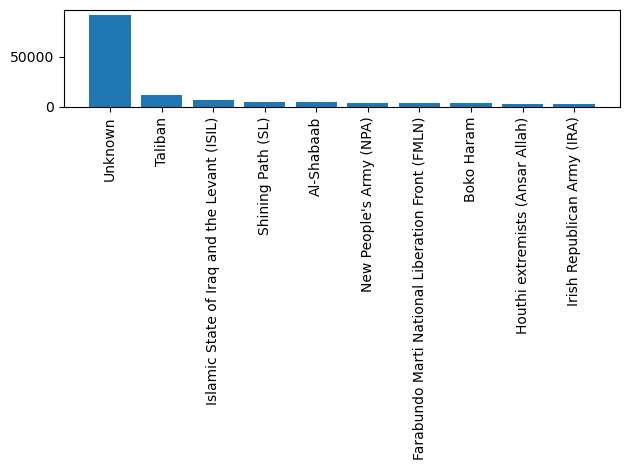

In [31]:
most_active_groups = gtd_df2['gname'].value_counts().nlargest(10)
plt.bar(most_active_groups.index, most_active_groups.values)
plt.xticks(rotation=90)
plt.tight_layout()

In [32]:
gtd_df3 = gtd_df2.drop(gtd_df2.select_dtypes(include=['object']), axis=1)


In [33]:
gtd_df3

iyear  imonth  iday  country  region  attacktype1  targtype1  \
0        1970       7     2       58       2            1         14   
1        1970       0     0      130       1            6          7   
2        1970       1     0      160       5            1         10   
3        1970       1     0       78       8            3          7   
4        1970       1     0      101       4            7          7   
...       ...     ...   ...      ...     ...          ...        ...   
209701   2020      12    31      228      10            3         14   
209702   2020      12    31      228      10            3         14   
209703   2020      12    31       75       8            7          4   
209704   2020      12    31        4       6            2         14   
209705   2020      12    31       33      11            2          4   

        targsubtype1  natlty1  weaptype1  
0               68.0     58.0         13  
1               45.0     21.0         13  
2               54.0    217.0         13  
3               46.0    217.0          6  
4               46.0    217.0          8  
...              ...      ...        ...  
209701          76.0    228.0          6  
209702          76.0    228.0          6  
209703          35.0     75.0          8  
209704          83.0      4.0          5  
209705          39.0     33.0          5  

[209706 rows x 10 columns]

array([[<Axes: xlabel='iyear', ylabel='iyear'>,
        <Axes: xlabel='imonth', ylabel='iyear'>,
        <Axes: xlabel='iday', ylabel='iyear'>,
        <Axes: xlabel='country', ylabel='iyear'>,
        <Axes: xlabel='region', ylabel='iyear'>,
        <Axes: xlabel='attacktype1', ylabel='iyear'>,
        <Axes: xlabel='targtype1', ylabel='iyear'>,
        <Axes: xlabel='targsubtype1', ylabel='iyear'>,
        <Axes: xlabel='natlty1', ylabel='iyear'>,
        <Axes: xlabel='weaptype1', ylabel='iyear'>],
       [<Axes: xlabel='iyear', ylabel='imonth'>,
        <Axes: xlabel='imonth', ylabel='imonth'>,
        <Axes: xlabel='iday', ylabel='imonth'>,
        <Axes: xlabel='country', ylabel='imonth'>,
        <Axes: xlabel='region', ylabel='imonth'>,
        <Axes: xlabel='attacktype1', ylabel='imonth'>,
        <Axes: xlabel='targtype1', ylabel='imonth'>,
        <Axes: xlabel='targsubtype1', ylabel='imonth'>,
        <Axes: xlabel='natlty1', ylabel='imonth'>,
        <Axes: xlabel='weaptyp

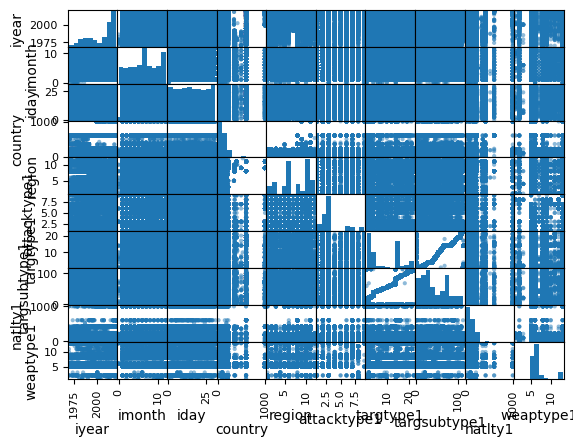

In [34]:
scatter_matrix(gtd_df3)

In [35]:
count_by_year = gtd_df3['iyear'].groupby(gtd_df3['iyear']).count()

In [55]:
war_on_terror_df = gtd_df3[(gtd_df3['iyear'] >= 2001) & (gtd_df3['iyear'] <= 2010)]

Text(0.5, 1.0, 'Occurrences by Year')

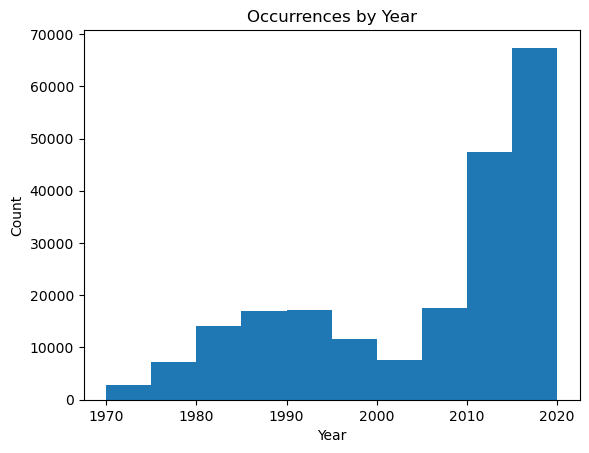

In [36]:
plt.hist(gtd_df3['iyear'], bins=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Occurrences by Year')

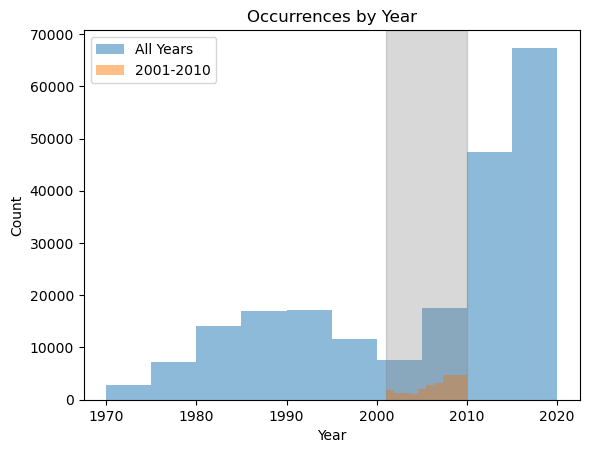

In [53]:
import matplotlib.pyplot as plt

# Filter the data for years 2001-2010
subset_data = gtd_df3[gtd_df3['iyear'].between(2001, 2010)]

# Plot the histogram for the entire dataset
plt.hist(gtd_df3['iyear'], bins=10, alpha=0.5, label='All Years')

# Plot the histogram for the subset of years 2001-2010
plt.hist(subset_data['iyear'], bins=10, alpha=0.5, label='2001-2010')

# Add a vertical shaded region for the years 2001-2010
plt.axvspan(2001, 2010, alpha=0.3, color='gray')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Occurrences by Year')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Occurrences by Year During GWOT')

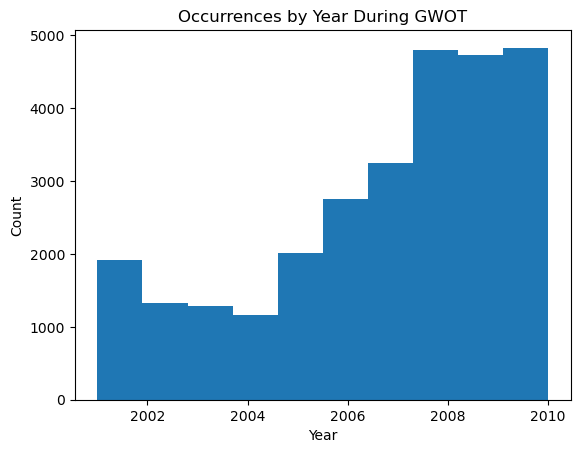

In [57]:
plt.hist(war_on_terror_df['iyear'], bins=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Occurrences by Year During GWOT')

In [37]:
px.histogram(gtd_df3, x='iyear')

In [38]:
gtd_df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaT       58   
1  197000000002   1970       0     0        NaN         0        NaT      130   
2  197001000001   1970       1     0        NaN         0        NaT      160   
3  197001000002   1970       1     0        NaN         0        NaT       78   
4  197001000003   1970       1     0        NaN         0        NaT      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [39]:
gtd_regression_df = gtd_df.dropna(axis=1)

In [40]:
gtd_regression_df2 = gtd_regression_df.drop(['eventid', 'extended', 'country', 'region', 'vicinity', 'crit1', 'crit2', 'crit3', 'attacktype1', 'targtype1', 'dbsource', 'INT_LOG', 'INT_MISC', 'INT_ANY', 'INT_IDEO', 'doubtterr', 'weaptype1'], axis=1)

In [41]:
gtd_regression_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   iyear            209706 non-null  int64 
 1   imonth           209706 non-null  int64 
 2   iday             209706 non-null  int64 
 3   country_txt      209706 non-null  object
 4   region_txt       209706 non-null  object
 5   provstate        209706 non-null  object
 6   success          209706 non-null  int64 
 7   suicide          209706 non-null  int64 
 8   attacktype1_txt  209706 non-null  object
 9   targtype1_txt    209706 non-null  object
 10  gname            209706 non-null  object
 11  individual       209706 non-null  int64 
 12  weaptype1_txt    209706 non-null  object
 13  property         209706 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 22.4+ MB


In [42]:
gtd_regression_df2['gname'].value_counts()

Unknown                                        91906
Taliban                                        11982
Islamic State of Iraq and the Levant (ISIL)     7254
Shining Path (SL)                               4564
Al-Shabaab                                      4419
                                               ...  
Sovereign Panama Patriotic Front                   1
Georgian guerrillas                                1
Hungarian Skin Head Group                          1
Togolese Peoples Rally                             1
Martyr Karim Daraam Brigade                        1
Name: gname, Length: 3725, dtype: int64

In [43]:
dummy_df = pd.get_dummies(gtd_regression_df2, columns=['country_txt', 'region_txt', 'provstate', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt'])

In [44]:
dummy_df.head()

iyear  imonth  iday  success  suicide  individual  property  \
0   1970       7     2        1        0           0         0   
1   1970       0     0        1        0           0         0   
2   1970       1     0        1        0           0         0   
3   1970       1     0        1        0           0         1   
4   1970       1     0        1        0           0         1   

   country_txt_Afghanistan  country_txt_Albania  country_txt_Algeria  ...  \
0                        0                    0                    0  ...   
1                        0                    0                    0  ...   
2                        0                    0                    0  ...   
3                        0                    0                    0  ...   
4                        0                    0                    0  ...   

   weaptype1_txt_Explosives  weaptype1_txt_Fake Weapons  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         1                           0   
4                         0                           0   

   weaptype1_txt_Firearms  weaptype1_txt_Incendiary  weaptype1_txt_Melee  \
0                       0                         0                    0   
1                       0                         0                    0   
2                       0                         0                    0   
3                       0                         0                    0   
4                       0                         1                    0   

   weaptype1_txt_Other  weaptype1_txt_Radiological  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   

   weaptype1_txt_Sabotage Equipment  weaptype1_txt_Unknown  \
0                                 0                      1   
1                                 0                      1   
2                                 0                      1   
3                                 0                      0   
4                                 0                      0   

   weaptype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)  
0                                                  0                                          
1                                                  0                                          
2                                                  0                                          
3                                                  0                                          
4                                                  0                                          

[5 rows x 6614 columns]

In [45]:
y = dummy_df['gname_Taliban'].values
# X = dummy_df.filter(like='region_txt')
X = dummy_df.drop('gname_Taliban', axis=1)

In [46]:
X

iyear  imonth  iday  success  suicide  individual  property  \
0        1970       7     2        1        0           0         0   
1        1970       0     0        1        0           0         0   
2        1970       1     0        1        0           0         0   
3        1970       1     0        1        0           0         1   
4        1970       1     0        1        0           0         1   
...       ...     ...   ...      ...      ...         ...       ...   
209701   2020      12    31        1        0           0         1   
209702   2020      12    31        1        0           0         0   
209703   2020      12    31        1        0           0         1   
209704   2020      12    31        1        0           0         0   
209705   2020      12    31        1        0           0         0   

        country_txt_Afghanistan  country_txt_Albania  country_txt_Algeria  \
0                             0                    0                    0   
1                             0                    0                    0   
2                             0                    0                    0   
3                             0                    0                    0   
4                             0                    0                    0   
...                         ...                  ...                  ...   
209701                        0                    0                    0   
209702                        0                    0                    0   
209703                        0                    0                    0   
209704                        1                    0                    0   
209705                        0                    0                    0   

        ...  weaptype1_txt_Explosives  weaptype1_txt_Fake Weapons  \
0       ...                         0                           0   
1       ...                         0                           0   
2       ...                         0                           0   
3       ...                         1                           0   
4       ...                         0                           0   
...     ...                       ...                         ...   
209701  ...                         1                           0   
209702  ...                         1                           0   
209703  ...                         0                           0   
209704  ...                         0                           0   
209705  ...                         0                           0   

        weaptype1_txt_Firearms  weaptype1_txt_Incendiary  weaptype1_txt_Melee  \
0                            0                         0                    0   
1                            0                         0                    0   
2                            0                         0                    0   
3                            0                         0                    0   
4                            0                         1                    0   
...                        ...                       ...                  ...   
209701                       0                         0                    0   
209702                       0                         0                    0   
209703                       0                         1                    0   
209704                       1                         0                    0   
209705                       1                         0                    0   

        weaptype1_txt_Other  weaptype1_txt_Radiological  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   
...                     ...                         ...   
209701         

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [48]:
# model = LogisticRegression()
# model.fit(X_train, y_train)

In [49]:
# y_pred = model.predict_proba(X_test)

In [50]:
# y_proba = y_pred[:,1]

In [51]:
# plt.hist(y_proba)

In [52]:
# def get_y_preds(probability, threshold=0.5):
#     y_pred = [1 if i > threshold else 0 for i in probability]
#     return y_pred

# get_y_preds(y_proba, 0.)